# <font color="blue">Using sentiment analysis to study relationship between Tweets and Stock Price Movement</font>

### <font color="Red"> Name :      Rohankumar Panchal</font>
### <font color="Red"> Student ID :20861956</font>

<style>
  h1, h2, h3, h4, h5, h6 {
    color: 'blue';
  }
</style>

## <font color ='Purple'>Proposed Business Problem
- This project presents the analysis of stock price movements and sentiment analysis of tweets for a selected group of companies. The aim is to explore the relationship between sentiment in tweets and stock price movements for the companies in the dataset.

# <font color = 'purple'>Data Exporation and Data Preprocessing</font>

### <font color = 'blue'> Import necessary libraries

In [2]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

### <font color = 'blue'> Importing Tweet Dataset </font>
The Tweet dataset consists of following columns:
- Timestamp : Conatining date, time of tweet and timezone
- Tweet : Contains tweet
- Stock Name : Ticker symbol ofthe stock
- Company Name : Name of the company to which the tweet is related
- Date_Format : Contains date and time without time zone (Performed in excel)
- Actual Date : Contains date and time but the time decreased by 4 hrs as the time zone of the stock price dataset (loaded subsquently) has time zone of (-04:00)

In [66]:
path = r"C:\Users\DELL1\Desktop\MMSc\MSCI 623\Project\stock_tweets.csv"#[1]
data  = pd.read_csv(path, encoding='latin-1')
df = pd.DataFrame(data)
df

,Timestamp,Tweet,Stock Name,Company Name,Date_Format,Actual Date
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",2022/09/29 23:41:16,2022/09/29 19:41:16
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",2022/09/29 23:24:43,2022/09/29 19:24:43
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",2022/09/29 23:18:08,2022/09/29 19:18:08
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",2022/09/29 22:40:07,2022/09/29 18:40:07
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",2022/09/29 22:27:05,2022/09/29 18:27:05
...,...,...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,2021/10/07 17:11:57,2021/10/07 13:11:57
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,2021/10/04 17:05:59,2021/10/04 13:05:59
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,2021/10/01 04:43:41,2021/10/01 00:43:41
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,2021/10/01 00:03:32,2021/09/30 20:03:32


### <font color = 'blue'> Converting the datatype of 'Actual Date' column in %Y-%m-%d %H:%M:%S format </font>

In [4]:
df['Actual Date'] = pd.to_datetime(df['Actual Date'], format='%Y-%m-%d %H:%M:%S')

,Timestamp,Tweet,Stock Name,Company Name,Date_Format,Actual Date
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",2022/09/29 23:41:16,2022-09-29 19:41:16
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",2022/09/29 23:24:43,2022-09-29 19:24:43
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",2022/09/29 23:18:08,2022-09-29 19:18:08
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",2022/09/29 22:40:07,2022-09-29 18:40:07
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",2022/09/29 22:27:05,2022-09-29 18:27:05
...,...,...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,2021/10/07 17:11:57,2021-10-07 13:11:57
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,2021/10/04 17:05:59,2021-10-04 13:05:59
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,2021/10/01 04:43:41,2021-10-01 00:43:41
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,2021/10/01 00:03:32,2021-09-30 20:03:32


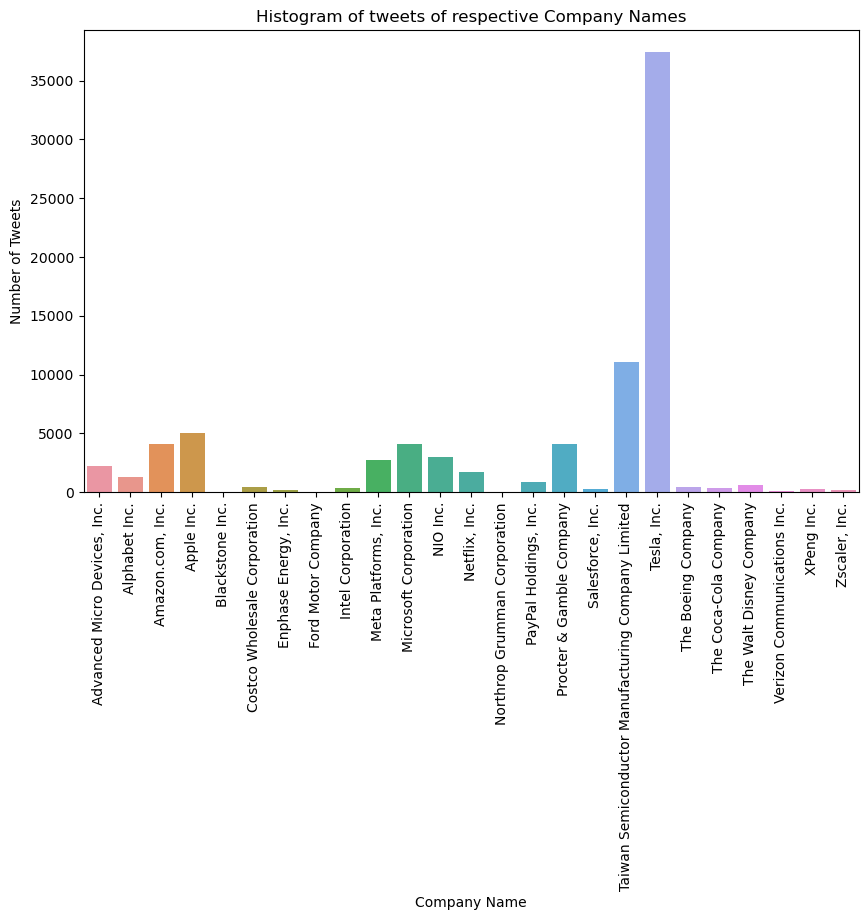

In [5]:
temp_df = df.groupby('Company Name').size().reset_index(name='Count')
plt.figure(figsize=(10, 6))  # Set the size of the figure (width, height)
sns.barplot(x='Company Name', y='Count', data=temp_df)
plt.xlabel('Company Name')
plt.ylabel('Number of Tweets')
plt.title('Histogram of tweets of respective Company Names')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

### <font color = 'blue'>Removing rows having null values

In [6]:
df = df.dropna()

,Timestamp,Tweet,Stock Name,Company Name,Date_Format,Actual Date
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",2022/09/29 23:41:16,2022-09-29 19:41:16
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",2022/09/29 23:24:43,2022-09-29 19:24:43
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",2022/09/29 23:18:08,2022-09-29 19:18:08
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",2022/09/29 22:40:07,2022-09-29 18:40:07
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",2022/09/29 22:27:05,2022-09-29 18:27:05
...,...,...,...,...,...,...
80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,2021/10/07 17:11:57,2021-10-07 13:11:57
80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,2021/10/04 17:05:59,2021-10-04 13:05:59
80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,2021/10/01 04:43:41,2021-10-01 00:43:41
80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,2021/10/01 00:03:32,2021-09-30 20:03:32


#### <font color = 'red'>We don't check for normality distribution (needed for Naïve Bayes) as there are no numeric variables in tweet dataset

### <font color = 'blue'> Filtering data by stocks which are included for analysis </font>

In [8]:
# Defining the stock for which analysis is conducted
stock_considered = ['TSLA','MSFT','GOOG', 'AAPL', 'PG','BA']

# Filter data for selected stock symbols

df = df[(df['Stock Name'].isin(stock_considered))]

# Get unique stock symbols and sort in reverse order

ticker_symbol = df['Stock Name'].unique().tolist()
ticker_symbol.sort(reverse = True)

# Get unique company names

company_symbol = df['Company Name'].unique().tolist()
company_symbol

['Tesla, Inc.',
 'Microsoft Corporation',
 'Procter & Gamble Company',
 'Alphabet Inc.',
 'Apple Inc.',
 'The Boeing Company']

### <font color = 'blue'> Getting hourly stock prices of all the stocks from 1st Oct 2021 to 30th September 2022 using Yahoo Finance Library in 'history </font>

In [9]:
# Create an empty list to store data for all stock symbols
data_list = []

# Specify the start and end dates for which the prices are to fetched and convert them  to datetime format

start_date = '2021-10-01 09:30:00'
start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_date = '2022-09-30 04:00:00'
end_date = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')

# Fetch historical stock price data for each stock symbol

for symbol in ticker_symbol:
    ticker = yf.Ticker(symbol)
    history = ticker.history(start=start_date, end=end_date, interval='1h')
    closing_history = ticker.history(start=start_date, end=end_date, interval='1d')

    # Add the 'Symbol' column to both DataFrames
    history['Symbol'] = symbol
    closing_history['Symbol'] = symbol
    # Append the DataFrames to the data_list
    data_list.append(history)
    data_list.append(closing_history)

# Concatenate all DataFrames in the data_list into the final DataFrame
history = pd.concat(data_list)

### <font color = 'blue'> Converting history table to dataframe and dropping unnecesary columns </font>

In [10]:
history = history.reset_index().rename(columns={'index': 'Datetime'})
history = pd.DataFrame(history)
history['Datetime'] = pd.to_datetime(history['Datetime']).dt.tz_localize(None)

# Drop unnecessary columns from historical stock price data

history = history.drop(['Volume', 'Dividends', 'Stock Splits', 'High', 'Low'], axis=1)
history

,Datetime,Open,Close,Symbol
0,2021-10-01 09:30:00,259.466675,254.966675,TSLA
1,2021-10-01 10:30:00,255.046677,258.903351,TSLA
2,2021-10-01 11:30:00,259.363342,257.333344,TSLA
3,2021-10-01 12:30:00,257.363342,256.933319,TSLA
4,2021-10-01 13:30:00,256.949982,257.203339,TSLA
...,...,...,...,...
12019,2022-09-23 00:00:00,150.501345,149.744797,AAPL
12020,2022-09-26 00:00:00,148.978307,150.083252,AAPL
12021,2022-09-27 00:00:00,152.044288,151.068741,AAPL
12022,2022-09-28 00:00:00,146.967495,149.157471,AAPL


### <font color = 'blue'>  Ploting the hourly price movement for different stocks

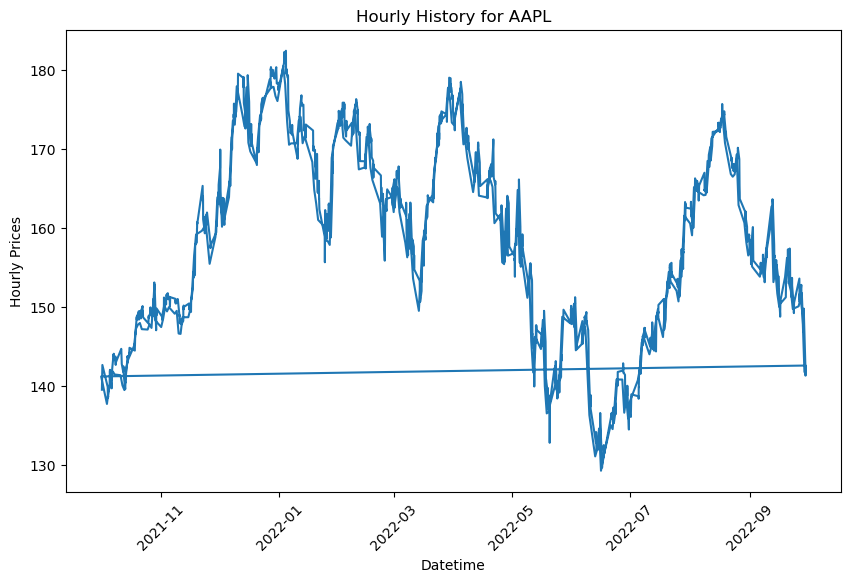

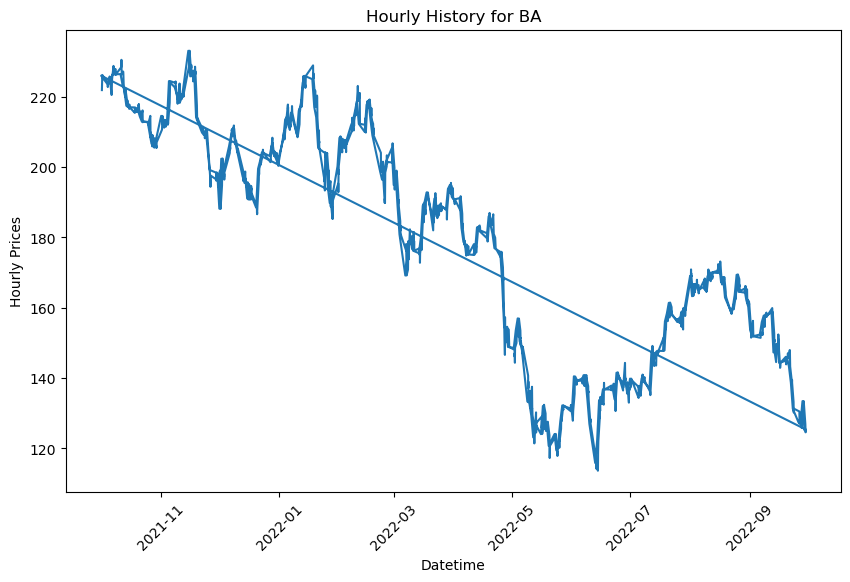

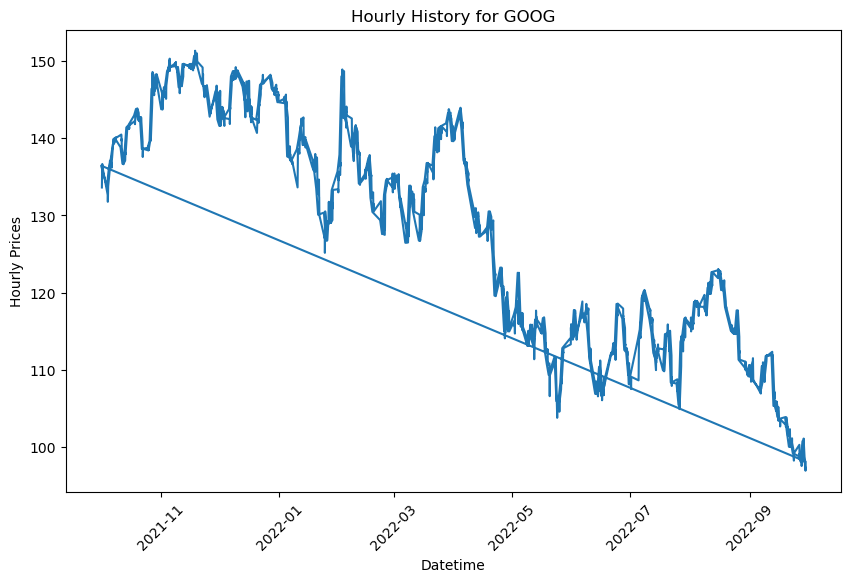

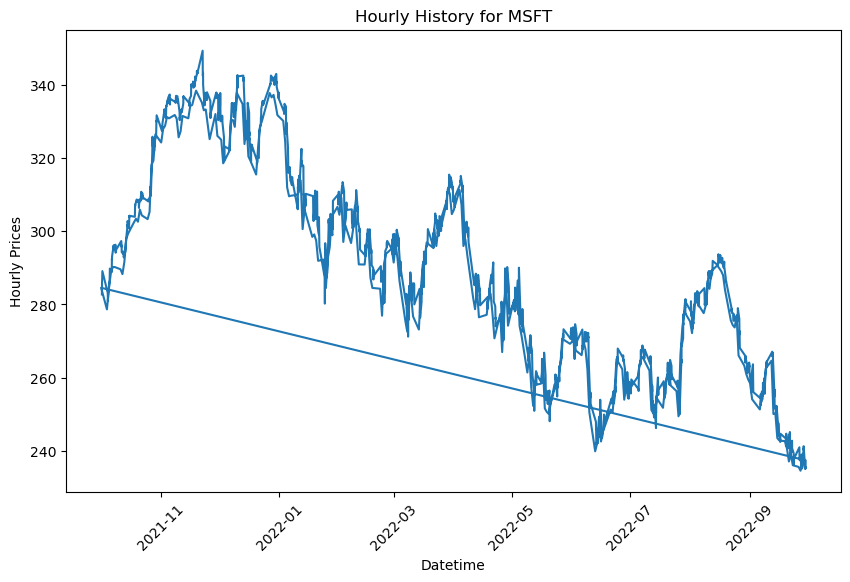

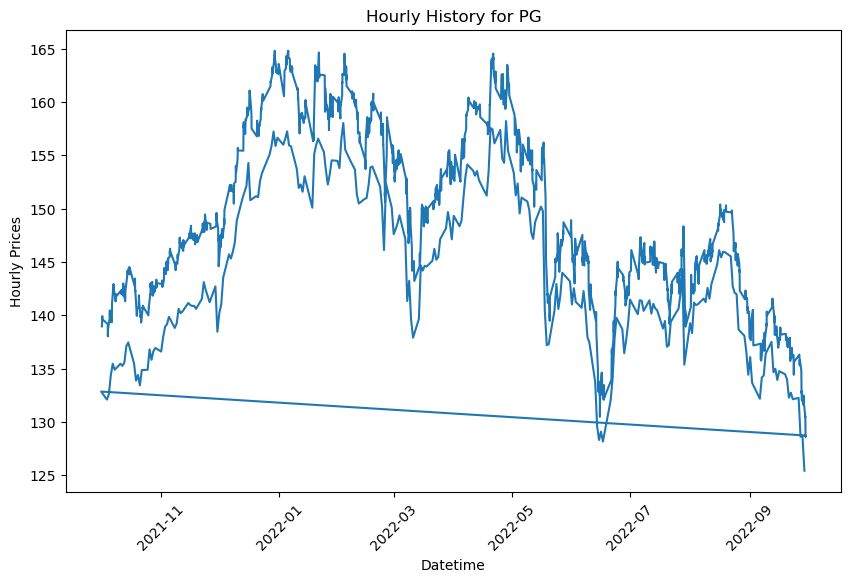

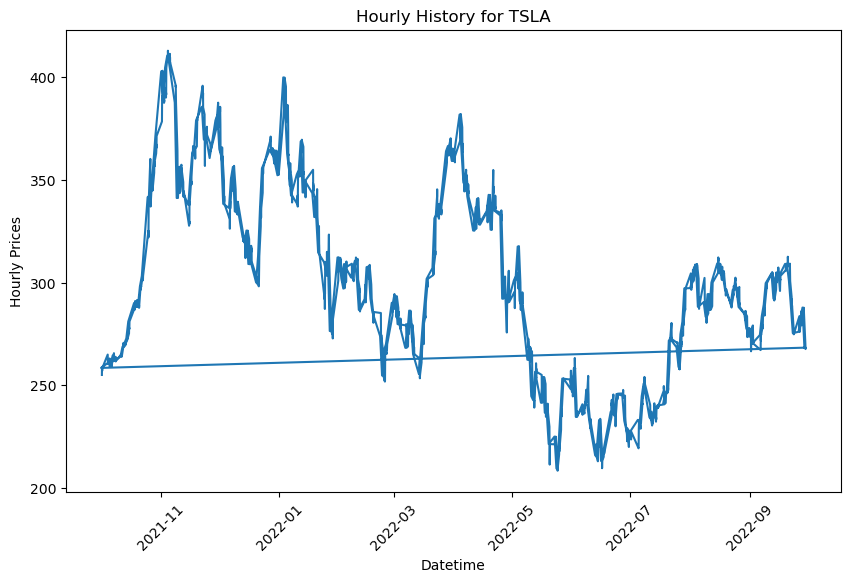

In [11]:
# Group the data by 'Symbol'
temp_data = history.groupby('Symbol')

# Create a separate plot for each symbol
for symbol, symbol_data in temp_data:
    plt.figure(figsize=(10, 6))  # Set the size of the figure (width, height)
    plt.plot('Datetime', 'Close', data=symbol_data)
    plt.xlabel('Datetime')
    plt.ylabel('Hourly Prices')
    plt.title(f'Hourly History for {symbol}')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
    plt.show()

### <font color = 'blue'>Retrieving index value of Dow Jones Industrial Average (^DJI) and NASDAQ (NQ=F)
- The Dow Jones IA and the Nasdaq represent a stock market index, or an average of a great many numbers derived from the price movements of certain stocks. 

In [12]:
datalist = []
index = ['^DJI','NQ=F']
start_date = '2021-10-01'
start_date = datetime.strptime(start_date, '%Y-%m-%d')
end_date = '2022-09-30'
end_date = datetime.strptime(end_date, '%Y-%m-%d')

# Fetch historical stock price data for each stock symbol

for symbol in index:
    ticker = yf.Ticker(symbol)
    index_history = ticker.history(start=start_date, end = end_date)

    # Add the 'Symbol' column to both DataFrames
    index_history['Symbol'] = symbol
    if symbol == 'NQ=F':
        index_history['Index Name'] = 'NASDAQ'
    else:
        index_history['Index Name'] = 'Dow Jones Industrial Average'
    datalist.append(index_history)

index_history = pd.concat(datalist)
index_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Index Name
Date,,,,,,,,,
2021-10-01 00:00:00-04:00,33930.699219,34490.558594,33785.539062,34326.460938,427580000,0.0,0.0,^DJI,Dow Jones Industrial Average
2021-10-04 00:00:00-04:00,34312.960938,34410.281250,33821.578125,34002.921875,396860000,0.0,0.0,^DJI,Dow Jones Industrial Average
2021-10-05 00:00:00-04:00,34035.250000,34490.949219,34035.250000,34314.671875,311520000,0.0,0.0,^DJI,Dow Jones Industrial Average
2021-10-06 00:00:00-04:00,34198.960938,34432.679688,33854.691406,34416.988281,322170000,0.0,0.0,^DJI,Dow Jones Industrial Average
2021-10-07 00:00:00-04:00,34509.718750,34975.191406,34509.718750,34754.941406,273290000,0.0,0.0,^DJI,Dow Jones Industrial Average
...,...,...,...,...,...,...,...,...,...
2022-09-23 00:00:00-04:00,11583.750000,11600.250000,11229.000000,11376.750000,799378,0.0,0.0,NQ=F,NASDAQ
2022-09-26 00:00:00-04:00,11362.500000,11537.750000,11256.500000,11316.250000,809853,0.0,0.0,NQ=F,NASDAQ
2022-09-27 00:00:00-04:00,11315.500000,11568.250000,11233.500000,11333.750000,841073,0.0,0.0,NQ=F,NASDAQ


### <font color = 'blue'>Calculating difference between closing index value and opening index value
- The difference between closing and opening value is calculated and percentage change is calculated, which show positive or negative bias of the market.

In [13]:
index_history = index_history.reset_index().rename(columns={'Date': 'Datetime'})
index_history = pd.DataFrame(index_history)
index_history['Datetime'] = pd.to_datetime(index_history['Datetime']).dt.tz_localize(None)

# Drop unnecessary columns from historical stock price data

index_history = index_history.drop(['Volume', 'Dividends', 'Stock Splits', 'High', 'Low'], axis=1)
index_history['% change'] = (index_history['Close'] - index_history['Open'])/index_history['Open']*100
index_history.head()

,Datetime,Open,Close,Symbol,Index Name,% change
0,2021-10-01,33930.699219,34326.460938,^DJI,Dow Jones Industrial Average,1.166382
1,2021-10-04,34312.960938,34002.921875,^DJI,Dow Jones Industrial Average,-0.903563
2,2021-10-05,34035.250000,34314.671875,^DJI,Dow Jones Industrial Average,0.820978
3,2021-10-06,34198.960938,34416.988281,^DJI,Dow Jones Industrial Average,0.637526
4,2021-10-07,34509.718750,34754.941406,^DJI,Dow Jones Industrial Average,0.710590


### <font color = 'blue'> Filter tweets that are lying between trading days and trading hours (9:30 AM to 4:00 PM) </font>

In [14]:
# Making list of all the trading days between 1st Oct 2021 and 30th Sept 2022
trading_days = history['Datetime'].dt.date.unique().tolist()

# Filtering tweet data based on trading days
df = df[df['Actual Date'].dt.date.isin(trading_days)]

# Filtering data which lies between the trading hours
df = df[(df['Actual Date'].dt.time >= pd.to_datetime('09:30:00').time()) & (df['Actual Date'].dt.time <= pd.to_datetime('16:00:00').time())]
df

,Timestamp,Tweet,Stock Name,Company Name,Date_Format,Actual Date
15,2022-09-29 19:38:29+00:00,Picked up some $TSLA shares at $269 https://t....,TSLA,"Tesla, Inc.",2022/09/29 19:38:29,2022-09-29 15:38:29
16,2022-09-29 19:36:59+00:00,2/ Even if @elonmusk loses the $TWTR trial (wo...,TSLA,"Tesla, Inc.",2022/09/29 19:36:59,2022-09-29 15:36:59
17,2022-09-29 19:27:54+00:00,Everyone should keep a long term perspective. ...,TSLA,"Tesla, Inc.",2022/09/29 19:27:54,2022-09-29 15:27:54
18,2022-09-29 19:24:50+00:00,$TSLA Cybertruck can act as a boat according t...,TSLA,"Tesla, Inc.",2022/09/29 19:24:50,2022-09-29 15:24:50
19,2022-09-29 19:17:48+00:00,#GigaBerlinBrandenburg\n@tesla destination cha...,TSLA,"Tesla, Inc.",2022/09/29 19:17:48,2022-09-29 15:17:48
...,...,...,...,...,...,...
76196,2021-10-13 14:37:50+00:00,ð¦s if you didnât catch $BA itâs okay th...,BA,The Boeing Company,2021/10/13 14:37:50,2021-10-13 10:37:50
76203,2021-10-08 17:14:29+00:00,How SpaceX compares to the market value of top...,BA,The Boeing Company,2021/10/08 17:14:29,2021-10-08 13:14:29
76207,2021-10-06 18:08:02+00:00,"Blessed with another amazing day. \n\n+$5,125....",BA,The Boeing Company,2021/10/06 18:08:02,2021-10-06 14:08:02
76208,2021-10-06 16:18:10+00:00,"Boeing statement to CNBC: ""We understand the a...",BA,The Boeing Company,2021/10/06 16:18:10,2021-10-06 12:18:10


#### <font color = 'blue'>Plotting Histogram for number of tweets for respective stocks after filtering </font>

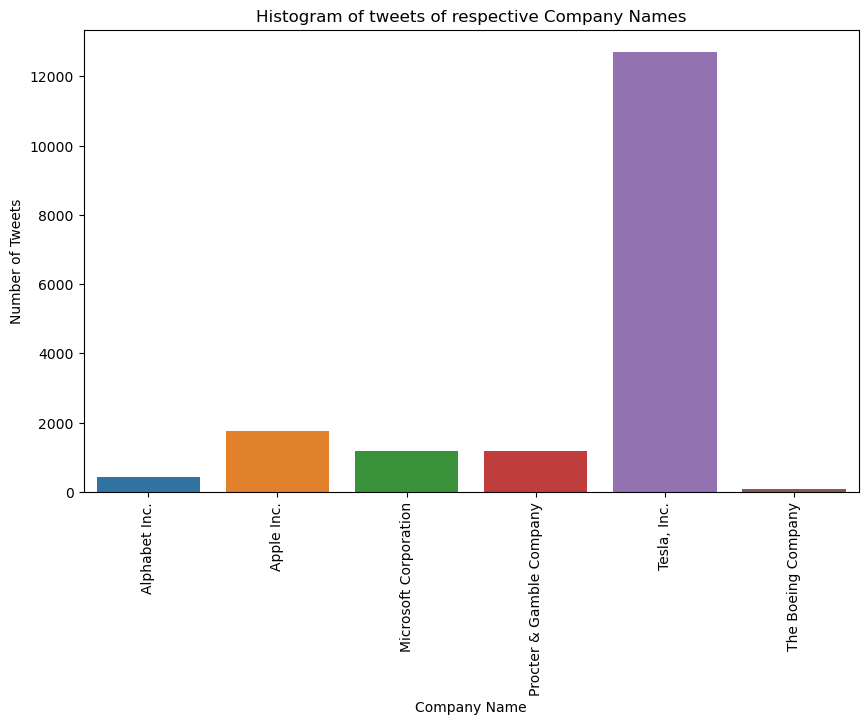

In [15]:
temp_df = df.groupby('Company Name').size().reset_index(name='Count')
plt.figure(figsize=(10, 6))  # Set the size of the figure (width, height)
sns.barplot(x='Company Name', y='Count', data=temp_df)
plt.xlabel('Company Name')
plt.ylabel('Number of Tweets')
plt.title('Histogram of tweets of respective Company Names')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

### <font color = 'blue'> Converting closing price time to 16:00:00</font>
- Closing price retrieved through yahoo finance library have 00:00:00 as the time of closing price which needs to be changed to 16:00:00

In [16]:
condition = history['Datetime'].dt.time.apply(lambda x: x == pd.to_datetime('00:00:00').time())
history.loc[condition, 'Datetime'] = history.loc[condition, 'Datetime'].dt.strftime('%Y-%m-%d') + ' 16:00:00'
history.to_csv('history.csv')

### <font color = 'blue'>Calculating 20 Day Moving average

In [17]:
# Define the desired start time
start_time = pd.to_datetime('2021-09-01 09:30:00')

history['Datetime'] = pd.to_datetime(history['Datetime'])

# Filter the DataFrame to keep only rows where the time is 00:00:00
history_filtered = history[history['Datetime'].dt.time == pd.to_datetime('16:00:00').time()]

# Group the DataFrame by 'Symbol'
grouped_history = history_filtered.groupby('Symbol')

# Calculate the rolling average of the previous 20 close prices for each group
history_filtered['20_Day_MA'] = grouped_history['Close'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
history_filtered['20_Day_MA'] = history_filtered['20_Day_MA'].mask(history_filtered['Datetime'] < start_time, None)


# Display the DataFrame with the new '20_Day_MA' column
history_filtered

C:\Users\DELL1\AppData\Local\Temp\ipykernel_1208\4198518307.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  history_filtered['20_Day_MA'] = grouped_history['Close'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
C:\Users\DELL1\AppData\Local\Temp\ipykernel_1208\4198518307.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  history_filtered['20_Day_MA'] = history_filtered['20_Day_MA'].mask(history_filtered['Datetime'] < start_time, None)


,Datetime,Open,Close,Symbol,20_Day_MA
1753,2021-10-01 16:00:00,259.466675,258.406677,TSLA,258.406677
1754,2021-10-04 16:00:00,265.500000,260.510010,TSLA,259.458344
1755,2021-10-05 16:00:00,261.600006,260.196655,TSLA,259.704447
1756,2021-10-06 16:00:00,258.733337,260.916656,TSLA,260.007500
1757,2021-10-07 16:00:00,261.820007,264.536682,TSLA,260.913336
...,...,...,...,...,...
12019,2022-09-23 16:00:00,150.501345,149.744797,AAPL,155.346163
12020,2022-09-26 16:00:00,148.978307,150.083252,AAPL,154.706590
12021,2022-09-27 16:00:00,152.044288,151.068741,AAPL,154.227781
12022,2022-09-28 16:00:00,146.967495,149.157471,AAPL,153.776346


In [18]:
history_filtered.to_csv('history_filtered.csv')

#### <font color = 'blue'> Creating 'main_data' dataframe creating hourly interval for grouping of tweets

In [19]:
# Create main_data DataFrame with start_interval and end_interval
main_data = pd.DataFrame()
main_data['start_interval'] = history['Datetime'].unique()
main_data['end_interval'] = main_data['start_interval'].shift(-1)
main_data = main_data.drop(main_data.index[-1])
main_data = main_data[main_data['start_interval'].dt.time != pd.to_datetime('15:30:00').time()]
main_data.head(15)

,start_interval,end_interval
0,2021-10-01 09:30:00,2021-10-01 10:30:00
1,2021-10-01 10:30:00,2021-10-01 11:30:00
2,2021-10-01 11:30:00,2021-10-01 12:30:00
3,2021-10-01 12:30:00,2021-10-01 13:30:00
4,2021-10-01 13:30:00,2021-10-01 14:30:00
5,2021-10-01 14:30:00,2021-10-01 15:30:00
7,2021-10-04 09:30:00,2021-10-04 10:30:00
8,2021-10-04 10:30:00,2021-10-04 11:30:00
9,2021-10-04 11:30:00,2021-10-04 12:30:00
10,2021-10-04 12:30:00,2021-10-04 13:30:00


### <font color = 'blue'>Creating 'main_data2' for merging tweets based on the hourly interval specified in 'main_data'

In [20]:
stocks = df['Company Name'].unique().tolist()
main_data2 = pd.DataFrame(columns=['start_interval', 'end_interval', 'merged_tweet', 'Company Name'])

### <font color = 'blue'>Grouping the tweets that lies in the specified interval</font>
- Here, the execution took 3 hrs. So, I have attached the main_data2 csv file which was my output.
- Printing after every loop to check the output.

In [21]:
# Create a new column to store merged tweets
main_data2['merged_tweet'] = ''
j = 0
# Iterate through each stock symbol
for ticker in stocks:
    # Create a temporary dataframe containing tweets for the current stock symbol
    temp_df = df[df['Company Name'] == ticker].copy()

    # Iterate through each row in main_data and filter tweets based on time intervals
    for i, interval in main_data.iterrows():
        start_time = pd.to_datetime(interval['start_interval'])
        end_time = pd.to_datetime(interval['end_interval'])

        # Iterate through each tweet row in the temporary dataframe
        for _, tweet_row in temp_df.iterrows():
            tweet_time = tweet_row['Actual Date']
            
            # Check if the tweet time is within the current time interval
            if start_time <= tweet_time <= end_time:
                # Concatenate tweets for the corresponding time interval and stock symbol
                main_data2.loc[len(main_data2)] = [start_time, end_time,tweet_row['Tweet'], ticker]
                print(main_data2)
                # Increment j to keep track of the row index in main_data2
                j += 1
main_data2

       start_interval        end_interval  \
0 2021-10-01 09:30:00 2021-10-01 10:30:00   

                                        merged_tweet Company Name  
0  Markets are now oversold. NASDAQ is off 6.5% n...  Tesla, Inc.  
       start_interval        end_interval  \
0 2021-10-01 09:30:00 2021-10-01 10:30:00   
1 2021-10-01 09:30:00 2021-10-01 10:30:00   

                                        merged_tweet Company Name  
0  Markets are now oversold. NASDAQ is off 6.5% n...  Tesla, Inc.  
1  I broke my rule holding $TSLA into a Friday. N...  Tesla, Inc.  
       start_interval        end_interval  \
0 2021-10-01 09:30:00 2021-10-01 10:30:00   
1 2021-10-01 09:30:00 2021-10-01 10:30:00   
2 2021-10-01 09:30:00 2021-10-01 10:30:00   

                                        merged_tweet Company Name  
0  Markets are now oversold. NASDAQ is off 6.5% n...  Tesla, Inc.  
1  I broke my rule holding $TSLA into a Friday. N...  Tesla, Inc.  
2  Jesus Christ. My portfolio looks like a murde

        start_interval        end_interval  \
0  2021-10-01 09:30:00 2021-10-01 10:30:00   
1  2021-10-01 09:30:00 2021-10-01 10:30:00   
2  2021-10-01 09:30:00 2021-10-01 10:30:00   
3  2021-10-01 09:30:00 2021-10-01 10:30:00   
4  2021-10-01 09:30:00 2021-10-01 10:30:00   
5  2021-10-01 09:30:00 2021-10-01 10:30:00   
6  2021-10-01 09:30:00 2021-10-01 10:30:00   
7  2021-10-01 09:30:00 2021-10-01 10:30:00   
8  2021-10-01 10:30:00 2021-10-01 11:30:00   
9  2021-10-01 10:30:00 2021-10-01 11:30:00   
10 2021-10-01 10:30:00 2021-10-01 11:30:00   
11 2021-10-01 10:30:00 2021-10-01 11:30:00   
12 2021-10-01 10:30:00 2021-10-01 11:30:00   
13 2021-10-01 10:30:00 2021-10-01 11:30:00   
14 2021-10-01 10:30:00 2021-10-01 11:30:00   
15 2021-10-01 11:30:00 2021-10-01 12:30:00   

                                         merged_tweet Company Name  
0   Markets are now oversold. NASDAQ is off 6.5% n...  Tesla, Inc.  
1   I broke my rule holding $TSLA into a Friday. N...  Tesla, Inc.  
2   Jesus 

        start_interval        end_interval  \
0  2021-10-01 09:30:00 2021-10-01 10:30:00   
1  2021-10-01 09:30:00 2021-10-01 10:30:00   
2  2021-10-01 09:30:00 2021-10-01 10:30:00   
3  2021-10-01 09:30:00 2021-10-01 10:30:00   
4  2021-10-01 09:30:00 2021-10-01 10:30:00   
5  2021-10-01 09:30:00 2021-10-01 10:30:00   
6  2021-10-01 09:30:00 2021-10-01 10:30:00   
7  2021-10-01 09:30:00 2021-10-01 10:30:00   
8  2021-10-01 10:30:00 2021-10-01 11:30:00   
9  2021-10-01 10:30:00 2021-10-01 11:30:00   
10 2021-10-01 10:30:00 2021-10-01 11:30:00   
11 2021-10-01 10:30:00 2021-10-01 11:30:00   
12 2021-10-01 10:30:00 2021-10-01 11:30:00   
13 2021-10-01 10:30:00 2021-10-01 11:30:00   
14 2021-10-01 10:30:00 2021-10-01 11:30:00   
15 2021-10-01 11:30:00 2021-10-01 12:30:00   
16 2021-10-01 11:30:00 2021-10-01 12:30:00   
17 2021-10-01 11:30:00 2021-10-01 12:30:00   
18 2021-10-01 11:30:00 2021-10-01 12:30:00   
19 2021-10-01 11:30:00 2021-10-01 12:30:00   
20 2021-10-01 11:30:00 2021-10-01 

        start_interval        end_interval  \
0  2021-10-01 09:30:00 2021-10-01 10:30:00   
1  2021-10-01 09:30:00 2021-10-01 10:30:00   
2  2021-10-01 09:30:00 2021-10-01 10:30:00   
3  2021-10-01 09:30:00 2021-10-01 10:30:00   
4  2021-10-01 09:30:00 2021-10-01 10:30:00   
5  2021-10-01 09:30:00 2021-10-01 10:30:00   
6  2021-10-01 09:30:00 2021-10-01 10:30:00   
7  2021-10-01 09:30:00 2021-10-01 10:30:00   
8  2021-10-01 10:30:00 2021-10-01 11:30:00   
9  2021-10-01 10:30:00 2021-10-01 11:30:00   
10 2021-10-01 10:30:00 2021-10-01 11:30:00   
11 2021-10-01 10:30:00 2021-10-01 11:30:00   
12 2021-10-01 10:30:00 2021-10-01 11:30:00   
13 2021-10-01 10:30:00 2021-10-01 11:30:00   
14 2021-10-01 10:30:00 2021-10-01 11:30:00   
15 2021-10-01 11:30:00 2021-10-01 12:30:00   
16 2021-10-01 11:30:00 2021-10-01 12:30:00   
17 2021-10-01 11:30:00 2021-10-01 12:30:00   
18 2021-10-01 11:30:00 2021-10-01 12:30:00   
19 2021-10-01 11:30:00 2021-10-01 12:30:00   
20 2021-10-01 11:30:00 2021-10-01 

KeyboardInterrupt: 

### <font color = 'blue'>Importing 'main_data2' csv file which is the output of previous cell</font>

In [22]:
file_path2 = r"C:\Users\DELL1\Desktop\MMSc\MSCI 623\Project\main_data2.csv"
main_data2 = pd.read_csv(file_path2, encoding='latin1')
main_data2 = pd.DataFrame(main_data2)
main_data2

,Unnamed: 0,start_interval,end_interval,merged_tweet,Company Name
0,0,2021-10-01 09:30:00,2021-10-01 10:30:00,Markets are now oversold. NASDAQ is off 6.5% n...,"Tesla, Inc."
1,1,2021-10-01 09:30:00,2021-10-01 10:30:00,I broke my rule holding $TSLA into a Friday. N...,"Tesla, Inc."
2,2,2021-10-01 09:30:00,2021-10-01 10:30:00,Jesus Christ. My portfolio looks like a murder...,"Tesla, Inc."
3,3,2021-10-01 09:30:00,2021-10-01 10:30:00,$TSLA was almost at $800 Monday. Ã°ÂÂÂ,"Tesla, Inc."
4,4,2021-10-01 09:30:00,2021-10-01 10:30:00,Q4 started $TSLA,"Tesla, Inc."
...,...,...,...,...,...
33283,33283,2022-08-05 16:00:00,2022-08-08 16:00:00,Called $Pypl news before news hit stock gapped...,The Boeing Company
33284,33284,2022-08-10 16:00:00,2022-08-11 16:00:00,$BA delivers first 787 to $AAL after 14 month ...,The Boeing Company
33285,33285,2022-08-18 16:00:00,2022-08-19 16:00:00,Two pilots in a $BA 737 fell asleep and overfl...,The Boeing Company
33286,33286,2022-09-14 16:00:00,2022-09-15 16:00:00,Alan Lowenthal (D) CA sits on the Transportati...,The Boeing Company


### <font color = 'blue'>Allocating stocks to their respective indices

In [23]:
stock_index = {'Company Name' :['Tesla, Inc.', 'Microsoft Corporation', 'Procter & Gamble Company', 'Alphabet Inc.', 'Apple Inc.', 'The Boeing Company'],
                  'Index Name' : ['NASDAQ','NASDAQ', 'Dow Jones Industrial Average', 'NASDAQ', 'NASDAQ', 'Dow Jones Industrial Average']}
stock_index = pd.DataFrame(stock_index)
stock_index

,Company Name,Index Name
0,"Tesla, Inc.",NASDAQ
1,Microsoft Corporation,NASDAQ
2,Procter & Gamble Company,Dow Jones Industrial Average
3,Alphabet Inc.,NASDAQ
4,Apple Inc.,NASDAQ
5,The Boeing Company,Dow Jones Industrial Average


### <font color = 'blue'>Merging main_data2 and stock_index dataframes to specify the index in Tweet dataset

In [24]:
main_data2 = pd.merge(main_data2, stock_index, on='Company Name', how='inner')
main_data2

,Unnamed: 0,start_interval,end_interval,merged_tweet,Company Name,Index Name
0,0,2021-10-01 09:30:00,2021-10-01 10:30:00,Markets are now oversold. NASDAQ is off 6.5% n...,"Tesla, Inc.",NASDAQ
1,1,2021-10-01 09:30:00,2021-10-01 10:30:00,I broke my rule holding $TSLA into a Friday. N...,"Tesla, Inc.",NASDAQ
2,2,2021-10-01 09:30:00,2021-10-01 10:30:00,Jesus Christ. My portfolio looks like a murder...,"Tesla, Inc.",NASDAQ
3,3,2021-10-01 09:30:00,2021-10-01 10:30:00,$TSLA was almost at $800 Monday. Ã°ÂÂÂ,"Tesla, Inc.",NASDAQ
4,4,2021-10-01 09:30:00,2021-10-01 10:30:00,Q4 started $TSLA,"Tesla, Inc.",NASDAQ
...,...,...,...,...,...,...
33283,33283,2022-08-05 16:00:00,2022-08-08 16:00:00,Called $Pypl news before news hit stock gapped...,The Boeing Company,Dow Jones Industrial Average
33284,33284,2022-08-10 16:00:00,2022-08-11 16:00:00,$BA delivers first 787 to $AAL after 14 month ...,The Boeing Company,Dow Jones Industrial Average
33285,33285,2022-08-18 16:00:00,2022-08-19 16:00:00,Two pilots in a $BA 737 fell asleep and overfl...,The Boeing Company,Dow Jones Industrial Average
33286,33286,2022-09-14 16:00:00,2022-09-15 16:00:00,Alan Lowenthal (D) CA sits on the Transportati...,The Boeing Company,Dow Jones Industrial Average


### <font color = 'blue'> Merging the tweets according to hourly interval using ';' as separator

In [25]:
# Group the data by 'Company Name' and 'start_interval', and aggregate 'Tweet' using a list
grouped_df = main_data2.groupby(['Company Name', 'start_interval', 'Index Name'])['merged_tweet'].agg(list).reset_index()

# Convert the list of tweets into a single merged tweet string using ';'.join
grouped_df['Merged Tweet'] = grouped_df['merged_tweet'].apply(';'.join)

# Drop the original 'Tweet' column as it is no longer needed
grouped_df.drop(columns=['merged_tweet'], inplace=True)

grouped_df

,Company Name,start_interval,Index Name,Merged Tweet
0,Alphabet Inc.,2021-10-01 11:30:00,NASDAQ,"Google Abandons Plans to Offer Bank Accounts, ..."
1,Alphabet Inc.,2021-10-01 16:00:00,NASDAQ,"Innovation &amp; Growth:\nSell $AAPL, Buy $TSL..."
2,Alphabet Inc.,2021-10-04 11:30:00,NASDAQ,BUY THE DIP. Buy fear. Sell Greed.\n\nFear ove...
3,Alphabet Inc.,2021-10-04 12:30:00,NASDAQ,"Innovation &amp; Growth:\nSell $AAPL, Buy $TSL..."
4,Alphabet Inc.,2021-10-05 16:00:00,NASDAQ,Largest market cap ($ trillion): \n\n1 $AAPL $...
...,...,...,...,...
5287,The Boeing Company,2022-08-18 16:00:00,Dow Jones Industrial Average,Two pilots in a $BA 737 fell asleep and overfl...
5288,The Boeing Company,2022-08-19 10:30:00,Dow Jones Industrial Average,Two pilots in a $BA 737 fell asleep and overfl...
5289,The Boeing Company,2022-09-14 16:00:00,Dow Jones Industrial Average,Alan Lowenthal (D) CA sits on the Transportati...
5290,The Boeing Company,2022-09-15 09:30:00,Dow Jones Industrial Average,Boeing Company $BA Wins $506 Million Contract ...


### <font color = 'blue'>Dropping rows which doesn't have any merged tweets</font>

In [26]:
grouped_df['start_interval'] = pd.to_datetime(grouped_df['start_interval'], format='%Y-%m-%d %H:%M:%S')
grouped_df.dropna(subset=['Merged Tweet'], inplace=True)
#Dropping tweets with intevals starting at 16:00:00 as we are not concerned with tweets after 16:00:00 as it would not be in trading hours
grouped_df = grouped_df[grouped_df['start_interval'].dt.time != pd.to_datetime('16:00:00').time()]

# <font color = 'purple'>Sentiment Analysis of Merged Tweets</font>

- To perform sentiment analysis, we preprocess the merged tweet text by converting it to lowercase, removing punctuation and numbers, and tokenizing the text into individual words. We also remove stop words to focus on meaningful words in the sentiment analysis.

- Next, we apply SentimentIntensityAnalyzer from the nltk.sentiment.vader library to calculate sentiment scores for each tweet. The sentiment scores indicate the overall sentiment of each tweet, with positive values representing positive sentiment, negative values representing negative sentiment, and zero representing neutral sentiment.

- Based on the sentiment scores, we categorize the sentiment into three classes: positive (1), neutral (0), and negative (-1). This categorization allows us to analyze the relationship between tweet sentiment and stock price movements.

### <font color = 'blue'>Calculating sentiment score</font>

In [27]:
# Convert the text to lowercase
grouped_df['Merged Tweet'] = grouped_df['Merged Tweet'].str.lower()

# Remove punctuation
grouped_df['Merged Tweet'] = grouped_df['Merged Tweet'].str.replace('[^\w\s]', '')

# Remove numbers
grouped_df['Merged Tweet'] = grouped_df['Merged Tweet'].str.replace('\d+', '')

# Tokenization
grouped_df['Tokens'] = grouped_df['Merged Tweet'].apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
grouped_df['Tokens'] = grouped_df['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each tweet
grouped_df['Sentiment Score'] = grouped_df['Merged Tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Map sentiment scores to positive (1), neutral (0), or negative (-1)
grouped_df['Sentiment'] = grouped_df['Sentiment Score'].apply(lambda score: 1 if score > 0 else (-1 if score < 0 else 0))

# Print the DataFrame with sentiment scores
grouped_df.head()

C:\Users\DELL1\AppData\Local\Temp\ipykernel_1208\3682075653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['Merged Tweet'] = grouped_df['Merged Tweet'].str.lower()
C:\Users\DELL1\AppData\Local\Temp\ipykernel_1208\3682075653.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  grouped_df['Merged Tweet'] = grouped_df['Merged Tweet'].str.replace('[^\w\s]', '')
C:\Users\DELL1\AppData\Local\Temp\ipykernel_1208\3682075653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,Company Name,start_interval,Index Name,Merged Tweet,Tokens,Sentiment Score,Sentiment
0,Alphabet Inc.,2021-10-01 11:30:00,NASDAQ,google abandons plans to offer bank accounts s...,"[google, abandons, plans, offer, bank, account...",-0.3182,-1
2,Alphabet Inc.,2021-10-04 11:30:00,NASDAQ,buy the dip buy fear sell greed\n\nfear over j...,"[buy, dip, buy, fear, sell, greed, fear, jobs,...",-0.9788,-1
3,Alphabet Inc.,2021-10-04 12:30:00,NASDAQ,innovation amp growth\nsell aapl buy tsla\n\np...,"[innovation, amp, growth, sell, aapl, buy, tsl...",0.8519,1
5,Alphabet Inc.,2021-10-06 11:30:00,NASDAQ,largest market cap trillion \n\n aapl t\n msf...,"[largest, market, cap, trillion, aapl, msft, g...",0.0000,0
7,Alphabet Inc.,2021-10-13 11:30:00,NASDAQ,the meeting with google was fantastic\nthere w...,"[meeting, google, fantastic, big, chainlink, a...",0.7096,1


# <font color = 'purple'>Data Preprocessing for Model Building</font>
- First, we load the required Python libraries and import the data from the CSV file containing stock tweets. We filter the data to consider only the stocks of interest, and we retrieve historical stock price data using Yahoo Finance (yfinance library) for the selected stock symbols.

- The historical stock price data is merged with the tweet data based on time intervals. We create one-hour time intervals and aggregate the tweets falling within each interval. This process results in a DataFrame containing the merged tweets, company names, sentiment scores, and stock price data for each time interval.

### <font color='blue'>Retriving ticker symbol for each stock </font>
- We need ticker symbol as the 'history' (containing hourly prices for each stock) dataframe has ticker symbol and does not have stock name.

In [28]:
Company_name = df[['Stock Name', 'Company Name']].drop_duplicates()
# Merge the grouped_df with the company_name dataframe on 'Company Name'
grouped_df = grouped_df.merge(Company_name, on='Company Name', how='left')

#Creating end_interval column which specifies the end of the interval for merged tweets

grouped_df['end_interval'] = grouped_df['start_interval'] + pd.Timedelta(hours=1)
grouped_df.head()

,Company Name,start_interval,Index Name,Merged Tweet,Tokens,Sentiment Score,Sentiment,Stock Name,end_interval
0,Alphabet Inc.,2021-10-01 11:30:00,NASDAQ,google abandons plans to offer bank accounts s...,"[google, abandons, plans, offer, bank, account...",-0.3182,-1,GOOG,2021-10-01 12:30:00
1,Alphabet Inc.,2021-10-04 11:30:00,NASDAQ,buy the dip buy fear sell greed\n\nfear over j...,"[buy, dip, buy, fear, sell, greed, fear, jobs,...",-0.9788,-1,GOOG,2021-10-04 12:30:00
2,Alphabet Inc.,2021-10-04 12:30:00,NASDAQ,innovation amp growth\nsell aapl buy tsla\n\np...,"[innovation, amp, growth, sell, aapl, buy, tsl...",0.8519,1,GOOG,2021-10-04 13:30:00
3,Alphabet Inc.,2021-10-06 11:30:00,NASDAQ,largest market cap trillion \n\n aapl t\n msf...,"[largest, market, cap, trillion, aapl, msft, g...",0.0000,0,GOOG,2021-10-06 12:30:00
4,Alphabet Inc.,2021-10-13 11:30:00,NASDAQ,the meeting with google was fantastic\nthere w...,"[meeting, google, fantastic, big, chainlink, a...",0.7096,1,GOOG,2021-10-13 12:30:00


In [29]:
#Converting start_interval column in datetime format
grouped_df['start_interval'] = pd.to_datetime(grouped_df['start_interval'], format='%Y-%m-%d %H:%M:%S')

### <font color = 'blue'>Matching  change in index with tweet dataset
- We retrieve the  change in the index depending on the date corresonding the grouped tweets.

In [30]:
for index, price in grouped_df.iterrows():
    # Convert the 'end_interval' to a datetime object
    end_interval_date = price['end_interval'].date()

    # Create the condition to match 'Index Name' and 'end_interval' in index_history
    condition = (index_history['Index Name'] == price['Index Name']) & (index_history['Datetime'].dt.date == end_interval_date)

    # Get the matching rows from index_history DataFrame
    matching_rows = index_history.loc[condition, '% change']

    if not matching_rows.empty:
        # If there are matching rows, calculate the 'change in index' by taking the first value
        grouped_df.at[index, '% change in index'] = matching_rows.iloc[0]
    else:
        # If there are no matching rows, assign None to 'change in index'
        grouped_df.at[index, '% change in index'] = None
grouped_df

,Company Name,start_interval,Index Name,Merged Tweet,Tokens,Sentiment Score,Sentiment,Stock Name,end_interval,% change in index
0,Alphabet Inc.,2021-10-01 11:30:00,NASDAQ,google abandons plans to offer bank accounts s...,"[google, abandons, plans, offer, bank, account...",-0.3182,-1,GOOG,2021-10-01 12:30:00,0.404700
1,Alphabet Inc.,2021-10-04 11:30:00,NASDAQ,buy the dip buy fear sell greed\n\nfear over j...,"[buy, dip, buy, fear, sell, greed, fear, jobs,...",-0.9788,-1,GOOG,2021-10-04 12:30:00,-2.182956
2,Alphabet Inc.,2021-10-04 12:30:00,NASDAQ,innovation amp growth\nsell aapl buy tsla\n\np...,"[innovation, amp, growth, sell, aapl, buy, tsl...",0.8519,1,GOOG,2021-10-04 13:30:00,-2.182956
3,Alphabet Inc.,2021-10-06 11:30:00,NASDAQ,largest market cap trillion \n\n aapl t\n msf...,"[largest, market, cap, trillion, aapl, msft, g...",0.0000,0,GOOG,2021-10-06 12:30:00,0.661574
4,Alphabet Inc.,2021-10-13 11:30:00,NASDAQ,the meeting with google was fantastic\nthere w...,"[meeting, google, fantastic, big, chainlink, a...",0.7096,1,GOOG,2021-10-13 12:30:00,1.166575
...,...,...,...,...,...,...,...,...,...,...
4077,The Boeing Company,2022-08-08 13:30:00,Dow Jones Industrial Average,called pypl news before news hit stock gapped ...,"[called, pypl, news, news, hit, stock, gapped,...",0.6344,1,BA,2022-08-08 14:30:00,-0.136326
4078,The Boeing Company,2022-08-11 09:30:00,Dow Jones Industrial Average,ba delivers first to aal after month delay ...,"[ba, delivers, first, aal, month, delay, produ...",0.5504,1,BA,2022-08-11 10:30:00,-0.343302
4079,The Boeing Company,2022-08-19 10:30:00,Dow Jones Industrial Average,two pilots in a ba fell asleep and overflew a...,"[two, pilots, ba, fell, asleep, overflew, runw...",0.0000,0,BA,2022-08-19 11:30:00,-0.583852
4080,The Boeing Company,2022-09-15 09:30:00,Dow Jones Industrial Average,boeing company ba wins million contract to ma...,"[boeing, company, ba, wins, million, contract,...",0.5719,1,BA,2022-09-15 10:30:00,-0.523248


### <font color = 'blue'>Retrieving 20 Day Moving Average to twitter dataset

In [31]:
for index, price in grouped_df.iterrows():
    # Convert the 'start_interval' to datetime type (if not already done)
    grouped_df.at[index, 'start_interval'] = pd.to_datetime(price['start_interval'])

    # Create the condition to match 'Symbol' and 'Datetime' in history_filtered
    condition = (history_filtered['Symbol'] == price['Stock Name']) & (history_filtered['Datetime'].dt.date == price['start_interval'].date())

    # Get the matching rows from index_history DataFrame
    matching_rows = history_filtered.loc[condition, '20_Day_MA']

    if not matching_rows.empty:
        # If there are matching rows, calculate the '20_Day_MA' by taking the first value
        grouped_df.at[index, '20_Day_MA'] = matching_rows.iloc[0]
    else:
        # If there are no matching rows, assign None to '20_Day_MA'
        grouped_df.at[index, '20_Day_MA'] = None

grouped_df

,Company Name,start_interval,Index Name,Merged Tweet,Tokens,Sentiment Score,Sentiment,Stock Name,end_interval,% change in index,20_Day_MA
0,Alphabet Inc.,2021-10-01 11:30:00,NASDAQ,google abandons plans to offer bank accounts s...,"[google, abandons, plans, offer, bank, account...",-0.3182,-1,GOOG,2021-10-01 12:30:00,0.404700,136.462494
1,Alphabet Inc.,2021-10-04 11:30:00,NASDAQ,buy the dip buy fear sell greed\n\nfear over j...,"[buy, dip, buy, fear, sell, greed, fear, jobs,...",-0.9788,-1,GOOG,2021-10-04 12:30:00,-2.182956,135.113747
2,Alphabet Inc.,2021-10-04 12:30:00,NASDAQ,innovation amp growth\nsell aapl buy tsla\n\np...,"[innovation, amp, growth, sell, aapl, buy, tsl...",0.8519,1,GOOG,2021-10-04 13:30:00,-2.182956,135.113747
3,Alphabet Inc.,2021-10-06 11:30:00,NASDAQ,largest market cap trillion \n\n aapl t\n msf...,"[largest, market, cap, trillion, aapl, msft, g...",0.0000,0,GOOG,2021-10-06 12:30:00,0.661574,135.939625
4,Alphabet Inc.,2021-10-13 11:30:00,NASDAQ,the meeting with google was fantastic\nthere w...,"[meeting, google, fantastic, big, chainlink, a...",0.7096,1,GOOG,2021-10-13 12:30:00,1.166575,137.384499
...,...,...,...,...,...,...,...,...,...,...,...
4077,The Boeing Company,2022-08-08 13:30:00,Dow Jones Industrial Average,called pypl news before news hit stock gapped ...,"[called, pypl, news, news, hit, stock, gapped,...",0.6344,1,BA,2022-08-08 14:30:00,-0.136326,157.563000
4078,The Boeing Company,2022-08-11 09:30:00,Dow Jones Industrial Average,ba delivers first to aal after month delay ...,"[ba, delivers, first, aal, month, delay, produ...",0.5504,1,BA,2022-08-11 10:30:00,-0.343302,160.738001
4079,The Boeing Company,2022-08-19 10:30:00,Dow Jones Industrial Average,two pilots in a ba fell asleep and overflew a...,"[two, pilots, ba, fell, asleep, overflew, runw...",0.0000,0,BA,2022-08-19 11:30:00,-0.583852,164.828500
4080,The Boeing Company,2022-09-15 09:30:00,Dow Jones Industrial Average,boeing company ba wins million contract to ma...,"[boeing, company, ba, wins, million, contract,...",0.5719,1,BA,2022-09-15 10:30:00,-0.523248,158.512501


### <font color='blue'>Retrieving price of the stock at the end of interval from'history' dataframe

In [32]:
for index, price in grouped_df.iterrows():
    condition = (history['Symbol'] == price['Stock Name']) & (history['Datetime'] == price['end_interval'])
    matching_rows = history.loc[condition, 'Close']
    if not matching_rows.empty:
        grouped_df.at[index, 'Price at end_interval'] = matching_rows.iloc[0]
    else:
        grouped_df.at[index, 'Price at end_interval'] = None

###  <font color = 'blue'>Creating column with time 1 hr after end of the interval
- We need time after 1 hr end of the interval becasue we will use the price at the end of interval as initial price and compare price after exactly 1 hr

In [33]:
grouped_df['1 hr lag'] = grouped_df['end_interval'] + pd.Timedelta(hours=1)
condition = grouped_df['1 hr lag'].dt.time.apply(lambda x: x == pd.to_datetime('16:30:00').time())
grouped_df.loc[condition, '1 hr lag'] = grouped_df.loc[condition, '1 hr lag'].dt.strftime('%Y-%m-%d') + ' 16:00:00'

### <font color = 'blue'>Retrieving price after 1 hr from end interval for the resprctive stock

In [34]:
for index, price in grouped_df.iterrows():
    condition = (history['Symbol'] == price['Stock Name']) & (history['Datetime'] == price['1 hr lag'])
    matching_rows =history.loc[condition, 'Close']
    if not matching_rows.empty:
        grouped_df.at[index, 'Price after 1 hr'] = matching_rows.iloc[0]
    else:
        # Handle the case when there is no matching row in history DataFrame
        grouped_df.at[index, 'Price after 1 hr'] = None

In [35]:
grouped_df.to_csv('grouped_df.csv')
grouped_df

,Company Name,start_interval,Index Name,Merged Tweet,Tokens,Sentiment Score,Sentiment,Stock Name,end_interval,% change in index,20_Day_MA,Price at end_interval,1 hr lag,Price after 1 hr
0,Alphabet Inc.,2021-10-01 11:30:00,NASDAQ,google abandons plans to offer bank accounts s...,"[google, abandons, plans, offer, bank, account...",-0.3182,-1,GOOG,2021-10-01 12:30:00,0.404700,136.462494,135.749496,2021-10-01 13:30:00,136.440002
1,Alphabet Inc.,2021-10-04 11:30:00,NASDAQ,buy the dip buy fear sell greed\n\nfear over j...,"[buy, dip, buy, fear, sell, greed, fear, jobs,...",-0.9788,-1,GOOG,2021-10-04 12:30:00,-2.182956,135.113747,132.240997,2021-10-04 13:30:00,132.983246
2,Alphabet Inc.,2021-10-04 12:30:00,NASDAQ,innovation amp growth\nsell aapl buy tsla\n\np...,"[innovation, amp, growth, sell, aapl, buy, tsl...",0.8519,1,GOOG,2021-10-04 13:30:00,-2.182956,135.113747,132.983246,2021-10-04 14:30:00,132.993500
3,Alphabet Inc.,2021-10-06 11:30:00,NASDAQ,largest market cap trillion \n\n aapl t\n msf...,"[largest, market, cap, trillion, aapl, msft, g...",0.0000,0,GOOG,2021-10-06 12:30:00,0.661574,135.939625,136.748993,2021-10-06 13:30:00,137.738998
4,Alphabet Inc.,2021-10-13 11:30:00,NASDAQ,the meeting with google was fantastic\nthere w...,"[meeting, google, fantastic, big, chainlink, a...",0.7096,1,GOOG,2021-10-13 12:30:00,1.166575,137.384499,138.174652,2021-10-13 13:30:00,137.988495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,The Boeing Company,2022-08-08 13:30:00,Dow Jones Industrial Average,called pypl news before news hit stock gapped ...,"[called, pypl, news, news, hit, stock, gapped,...",0.6344,1,BA,2022-08-08 14:30:00,-0.136326,157.563000,166.360001,2022-08-08 15:30:00,165.910004
4078,The Boeing Company,2022-08-11 09:30:00,Dow Jones Industrial Average,ba delivers first to aal after month delay ...,"[ba, delivers, first, aal, month, delay, produ...",0.5504,1,BA,2022-08-11 10:30:00,-0.343302,160.738001,169.179993,2022-08-11 11:30:00,168.470001
4079,The Boeing Company,2022-08-19 10:30:00,Dow Jones Industrial Average,two pilots in a ba fell asleep and overflew a...,"[two, pilots, ba, fell, asleep, overflew, runw...",0.0000,0,BA,2022-08-19 11:30:00,-0.583852,164.828500,162.919998,2022-08-19 12:30:00,163.220001
4080,The Boeing Company,2022-09-15 09:30:00,Dow Jones Industrial Average,boeing company ba wins million contract to ma...,"[boeing, company, ba, wins, million, contract,...",0.5719,1,BA,2022-09-15 10:30:00,-0.523248,158.512501,151.160004,2022-09-15 11:30:00,147.839996


### <font color = 'blue'>Dropping the rows that has null value
    - Trading hours for 26th November is from 09:30:00 to 13:00:00. So, we need to remove the intervals that requires price after 13:00:00

In [36]:
#We drop the rows having date 26th November as trading stops at 1 pm because of black friday
grouped_df.dropna(subset=['Price at end_interval'], inplace=True)

### <font color = 'blue'>Creating Class label of 'Did Price Rise'
    - First, we take the difference of price after 1 hr and price at end_interval.
    - If the price is >0 then, we label it 1 indicating rise in price and 0 if the price <=0.

In [37]:
#Calculating change in price
grouped_df['change in price'] = grouped_df['Price after 1 hr'] - grouped_df['Price at end_interval']

#Creating labels
grouped_df['Did Price Rise'] = grouped_df['change in price'].apply(lambda x: 1 if x>0 else 0)
grouped_df

,Company Name,start_interval,Index Name,Merged Tweet,Tokens,Sentiment Score,Sentiment,Stock Name,end_interval,% change in index,20_Day_MA,Price at end_interval,1 hr lag,Price after 1 hr,change in price,Did Price Rise
0,Alphabet Inc.,2021-10-01 11:30:00,NASDAQ,google abandons plans to offer bank accounts s...,"[google, abandons, plans, offer, bank, account...",-0.3182,-1,GOOG,2021-10-01 12:30:00,0.404700,136.462494,135.749496,2021-10-01 13:30:00,136.440002,0.690506,1
1,Alphabet Inc.,2021-10-04 11:30:00,NASDAQ,buy the dip buy fear sell greed\n\nfear over j...,"[buy, dip, buy, fear, sell, greed, fear, jobs,...",-0.9788,-1,GOOG,2021-10-04 12:30:00,-2.182956,135.113747,132.240997,2021-10-04 13:30:00,132.983246,0.742249,1
2,Alphabet Inc.,2021-10-04 12:30:00,NASDAQ,innovation amp growth\nsell aapl buy tsla\n\np...,"[innovation, amp, growth, sell, aapl, buy, tsl...",0.8519,1,GOOG,2021-10-04 13:30:00,-2.182956,135.113747,132.983246,2021-10-04 14:30:00,132.993500,0.010254,1
3,Alphabet Inc.,2021-10-06 11:30:00,NASDAQ,largest market cap trillion \n\n aapl t\n msf...,"[largest, market, cap, trillion, aapl, msft, g...",0.0000,0,GOOG,2021-10-06 12:30:00,0.661574,135.939625,136.748993,2021-10-06 13:30:00,137.738998,0.990005,1
4,Alphabet Inc.,2021-10-13 11:30:00,NASDAQ,the meeting with google was fantastic\nthere w...,"[meeting, google, fantastic, big, chainlink, a...",0.7096,1,GOOG,2021-10-13 12:30:00,1.166575,137.384499,138.174652,2021-10-13 13:30:00,137.988495,-0.186157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,The Boeing Company,2022-08-08 13:30:00,Dow Jones Industrial Average,called pypl news before news hit stock gapped ...,"[called, pypl, news, news, hit, stock, gapped,...",0.6344,1,BA,2022-08-08 14:30:00,-0.136326,157.563000,166.360001,2022-08-08 15:30:00,165.910004,-0.449997,0
4078,The Boeing Company,2022-08-11 09:30:00,Dow Jones Industrial Average,ba delivers first to aal after month delay ...,"[ba, delivers, first, aal, month, delay, produ...",0.5504,1,BA,2022-08-11 10:30:00,-0.343302,160.738001,169.179993,2022-08-11 11:30:00,168.470001,-0.709991,0
4079,The Boeing Company,2022-08-19 10:30:00,Dow Jones Industrial Average,two pilots in a ba fell asleep and overflew a...,"[two, pilots, ba, fell, asleep, overflew, runw...",0.0000,0,BA,2022-08-19 11:30:00,-0.583852,164.828500,162.919998,2022-08-19 12:30:00,163.220001,0.300003,1
4080,The Boeing Company,2022-09-15 09:30:00,Dow Jones Industrial Average,boeing company ba wins million contract to ma...,"[boeing, company, ba, wins, million, contract,...",0.5719,1,BA,2022-09-15 10:30:00,-0.523248,158.512501,151.160004,2022-09-15 11:30:00,147.839996,-3.320007,0


#### <font color = 'red'>Initially, as directed by professor, I was going to add type of indutry to which the stock belongs as a categorical but as the stocks are from different industry, it would have made no difference.

In [38]:
#industry_types = {'company_name' :['Tesla, Inc.', 'Microsoft Corporation', 'Procter & Gamble Company', 'Alphabet Inc.', 'Apple Inc.', 'The Boeing Company'],
                  #'industry' : ['Auto Manufacturers','Software—Infrastructure', 'Household & Personal Products', 'Internet Content & Information', 'Consumer Electronics', 'Aerospace & Defense']}
#industry = pd.DataFrame(industry_types)
#industry

IndentationError: unexpected indent (4141650483.py, line 2)

In [39]:
#grouped_df = pd.merge(grouped_df, industry, left_on='Company Name', right_on='company_name', how='inner')
#grouped_df

# <font color = 'purple'>Feature Engineering
1) Sentiment :
- Twitter is a widely used platform with millions of active users, making it a significant source of information and sentiment about various stocks and the overall market. Sentiment analysis can help capture the collective emotions and opinions of Twitter users, reflecting the crowd psychology that can influence stock prices.
    
2) % Change in Index :
- The DJI and NASDAQ represent a broad selection of stocks from various industries. The percentage change in these major indices reflects the overall sentiment of the market on a given day. Positive changes suggest optimism and confidence, while negative changes indicate uncertainty or pessimism. This sentiment can influence individual stock movements since many stocks are correlated with market indices.[2]
    
3) 20-day Moving Average :
- By calculating the moving average over a fixed period, such as 20 days, it becomes easier to identify the direction of the stock's trend. If the stock price is consistently trading above the 20-day moving average, it indicates an uptrend, while trading below the moving average suggests a downtrend.[3]

# <font color = 'purple'>Price Movement Prediction Model
- To predict stock price movements, we build a logistic regression model and Naïve Bayes. The model takes the sentiment polarity or sentiment scores and additional features as input and predicts whether the stock price will rise or not after one hour.

- We split the dataset into training and testing sets using the train_test_split function from sklearn.model_selection. The logistic regression model and Naïve Bayes are then trained on the training set using the fit method.

## <font color = 'purple'>Logistic Regression Model

### <font color = 'blue'>Filtering columns for model training
- <font color = 'red'>'data_for_analysis_1' </font>includes Sentiment (labels with 1 as positive, -1 as negative and 0 as neutral), % change in Index and 20 Day Moving Average as predictor variable and Did Price Rise as class label.

In [40]:
data_for_analysis_1 = grouped_df[['Sentiment', '% change in index', '20_Day_MA','Did Price Rise']].copy()
data_for_analysis_1

,Sentiment,% change in index,20_Day_MA,Did Price Rise
0,-1,0.404700,136.462494,1
1,-1,-2.182956,135.113747,1
2,1,-2.182956,135.113747,1
3,0,0.661574,135.939625,1
4,1,1.166575,137.384499,0
...,...,...,...,...
4077,1,-0.136326,157.563000,0
4078,1,-0.343302,160.738001,0
4079,0,-0.583852,164.828500,1
4080,1,-0.523248,158.512501,0


### <font color = 'blue'>Taking 'data_for_analysis_1' and splitting as training and testing data

In [41]:
y1 = data_for_analysis_1['Did Price Rise']
predictors = data_for_analysis_1.drop(['Did Price Rise'], axis=1)
predictors_train, predictors_test, y_train, y_test = train_test_split(predictors, y1, test_size=0.2)
predictors_train

,Sentiment,% change in index,20_Day_MA
2936,1,0.115459,344.295497
3462,-1,2.654162,288.395168
1715,-1,-2.185230,254.798068
2414,1,0.661116,139.522114
3844,1,0.149967,291.599667
...,...,...,...
1924,1,-0.085629,138.571568
449,0,0.804899,155.757296
2074,1,-0.017096,154.172224
2880,1,-0.469342,339.117166


### <font color= 'blue'>Fitting Logistic Regression Model on the training data and predicting the values of testing dataset

In [42]:
# You can proceed to fit and evaluate the logistic regression model as before
log_reg_Model_1 = LogisticRegression()
log_reg_Model_1.fit(predictors_train, y_train)

# Make predictions on the test set
y_pred_log_reg_Model_1 = log_reg_Model_1.predict(predictors_test)

# Calculate accuracy
Accuracy_of_log_reg_Model_1 = accuracy_score(y_test, y_pred_log_reg_Model_1)

# Calculate confusion matrix
confusion_matrix_of_log_reg_Model_1 = confusion_matrix(y_test, y_pred_log_reg_Model_1)

print("Confusion Matrix:")
print(confusion_matrix_of_log_reg_Model_1)
print("Accuracy of LogReg Model 1:", Accuracy_of_log_reg_Model_1)

Confusion Matrix:
[[323 132]
 [211 150]]
Accuracy of LogReg Model 1: 0.5796568627450981


### <font color =' blue'>Visualising the Confusion Matrix for Logistic Regression with Sentiment Polarity

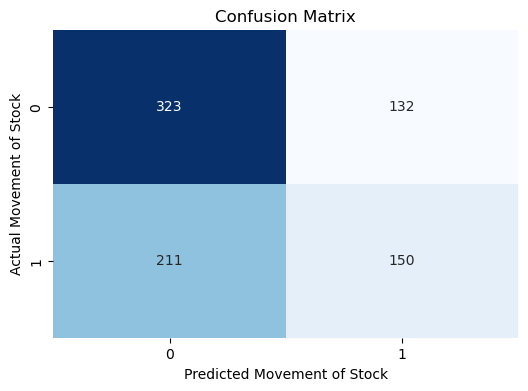

In [43]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_of_log_reg_Model_1, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Movement of Stock')
plt.ylabel('Actual Movement of Stock')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

### <font color = 'blue'>Creating dataframe which has predited labels and corresponding Sentiment polarity

In [44]:
# Assuming you have the 'Sentiment_Polarity' column in the 'predictors_test' dataframe
# Get the indices of the test set
test_indices = predictors_test.index

# Create a dataframe with the predicted datapoints and their corresponding sentiment polarity
predicted_data_with_sentiment = pd.DataFrame({
    'Predicted': y_pred_log_reg_Model_1,
    'Sentiment_Polarity': predictors.loc[test_indices, 'Sentiment']
})

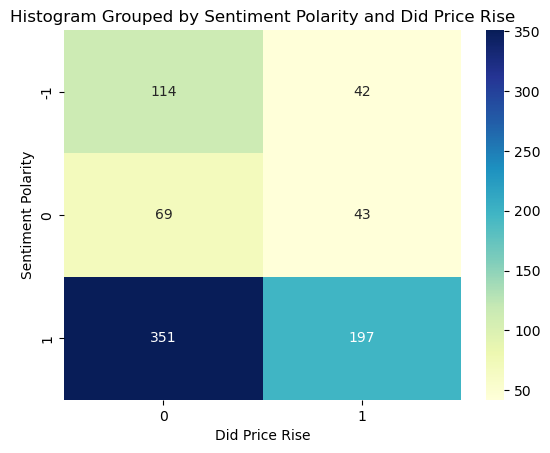

In [45]:
# Create a crosstab to get the counts for each combination of 'Sentiment_Polarity' and 'Did Price Rise'
cross_tab = pd.crosstab(predicted_data_with_sentiment['Sentiment_Polarity'], predicted_data_with_sentiment['Predicted'])

# Plot the heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.xlabel('Did Price Rise')
plt.ylabel('Sentiment Polarity')
plt.title('Histogram Grouped by Sentiment Polarity and Did Price Rise')
plt.show()

## <font color = 'purple'>Results
- The accuracy of the model is approximately 60%. This means that the model's overall performance is moderate, as it correctly predicts around 60% of the instances in the dataset.
- From the confusion matrix, we can observe that the model is better at predicting instances where the price did not rise or remained the same (negative class) compared to instances where the price actually rose (positive class). It has a higher number of true negatives than true positives. However, it is struggling with correctly predicting instances of price rise (true positives) and is also prone to false positives in such cases.
- From the histogram above, we observe that though the sentiment is positive (1), the model does not predicts price rise. One of the reason for this occurence maybe that the several datapoints with positive sentiment would have encountered price decrease. This increase chaos in the model which in turn leads to decrease in accuracy.
- Here,The model's correctly maps positive sentiment to price rise. But, the accuracy is low because though the model correctly maps class variablle to sentimnet, the actual movement of stock is totally different.

### <font color = 'blue'>Taking data_for_analysis_2 and spliting into training and testing
- data_for_analysis_2 has Sentiment Score.

In [46]:
data_for_analysis_2 = grouped_df[['Sentiment Score', '% change in index', '20_Day_MA','Did Price Rise']].copy()
data_for_analysis_2

,Sentiment Score,% change in index,20_Day_MA,Did Price Rise
0,-0.3182,0.404700,136.462494,1
1,-0.9788,-2.182956,135.113747,1
2,0.8519,-2.182956,135.113747,1
3,0.0000,0.661574,135.939625,1
4,0.7096,1.166575,137.384499,0
...,...,...,...,...
4077,0.6344,-0.136326,157.563000,0
4078,0.5504,-0.343302,160.738001,0
4079,0.0000,-0.583852,164.828500,1
4080,0.5719,-0.523248,158.512501,0


In [47]:
y1 = data_for_analysis_2['Did Price Rise']
predictors = data_for_analysis_2.drop(['Did Price Rise'], axis=1)
predictors_train, predictors_test, y_train, y_test = train_test_split(predictors, y1, test_size=0.2)
predictors_train

,Sentiment Score,% change in index,20_Day_MA
3438,-0.8628,-2.911893,305.999169
1476,0.8861,1.834607,287.428233
1442,-0.6369,-1.631217,292.896298
1796,0.4215,0.292817,281.138625
1785,0.3400,1.749817,270.903391
...,...,...,...
126,0.0000,-0.645034,135.969701
490,0.2023,-0.980783,166.347314
3654,0.7717,1.744787,231.761667
3975,0.5489,-1.025258,291.716504


### <font color= 'blue'>Fitting Logistic Regression Model with Sentiment Score on the training data and predicting the values of testing dataset

In [48]:
# You can proceed to fit and evaluate the logistic regression model as before
log_reg_Model_2 = LogisticRegression()
log_reg_Model_2.fit(predictors_train, y_train)

# Make predictions on the test set
y_pred_log_reg_Model_2 = log_reg_Model_2.predict(predictors_test)

# Calculate accuracy
Accuracy_of_log_reg_Model_2 = accuracy_score(y_test, y_pred_log_reg_Model_2)

# Calculate confusion matrix
confusion_matrix_of_log_reg_Model_2 = confusion_matrix(y_test, y_pred_log_reg_Model_2)

print("Confusion Matrix:")
print(confusion_matrix_of_log_reg_Model_2)
print("Accuracy of LogReg Model 2:", Accuracy_of_log_reg_Model_2)

Confusion Matrix:
[[319 138]
 [195 164]]
Accuracy of LogReg Model 2: 0.5919117647058824


### <font color = 'blue'>Visualising Confusion Matrix for Model 2

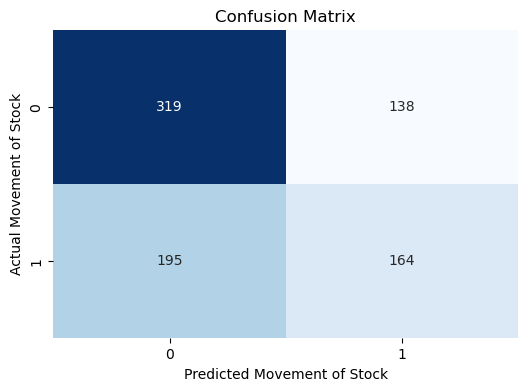

In [49]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_of_log_reg_Model_2, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Movement of Stock')
plt.ylabel('Actual Movement of Stock')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [50]:
# Get the indices of the test set
test_indices = predictors_test.index

# Create a dataframe with the predicted datapoints and their corresponding sentiment polarity
predicted_data_with_sentiment = pd.DataFrame({
    'Predicted': y_pred_log_reg_Model_2,
    'Sentiment_Polarity': predictors.loc[test_indices, 'Sentiment Score']
})
predicted_data_with_sentiment

,Predicted,Sentiment_Polarity
3929,1,-0.1765
172,0,0.0000
2002,0,0.6249
3059,1,0.8519
3214,1,0.9705
...,...,...
3868,1,0.1024
2206,0,0.6264
2302,0,0.5859
1451,0,0.2263


### <font color = 'Blue'>Frequency Distribution by semtiment score, grouped by prediction labels (Did it rise or not

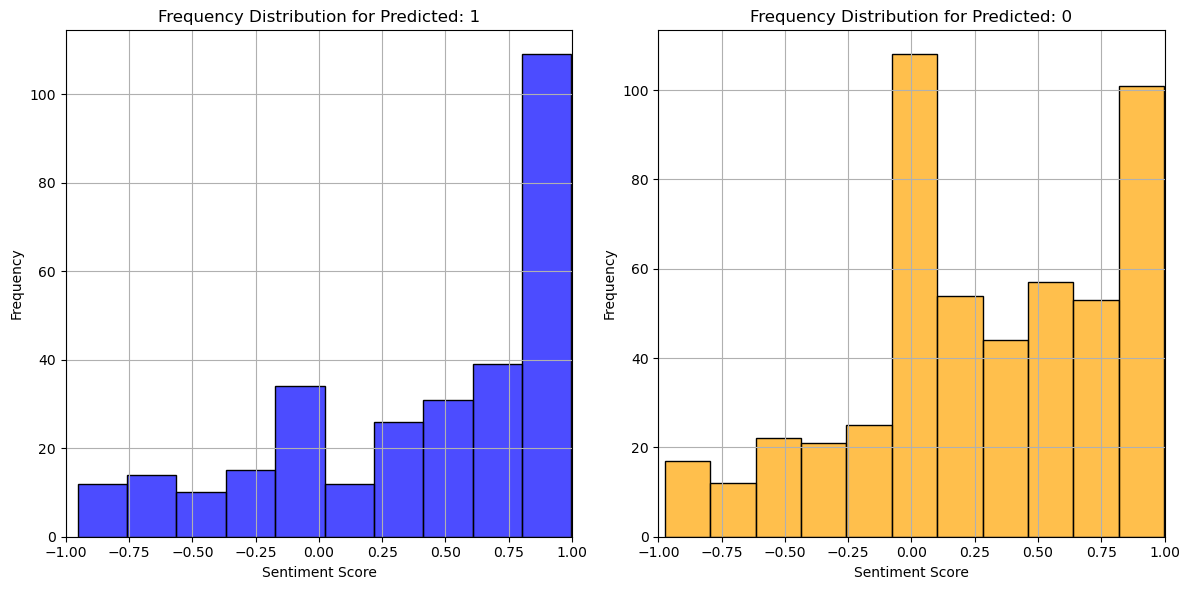

In [51]:
# Create a DataFrame combining the predicted values and the 'Sentiment Score' from the test set
result_df = pd.DataFrame({
    'Predicted Did Price': y_pred_log_reg_Model_2, 
    'Sentiment Score': predictors_test['Sentiment Score']
})

# Separate the data into two DataFrames based on predicted values '1' as 'Yes' and '0' as 'No'
yes_predictions = result_df[result_df['Predicted Did Price'] == 1]
no_predictions = result_df[result_df['Predicted Did Price'] == 0]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the frequency distribution for predicted 'Yes'
sns.histplot(data=yes_predictions, x='Sentiment Score', bins='auto', color='blue', alpha=0.7, label='Predicted: Yes', ax=axes[0])
axes[0].set_title('Frequency Distribution for Predicted: 1')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)
axes[0].set_xlim(-1, 1)

# Plot the frequency distribution for predicted 'No'
sns.histplot(data=no_predictions, x='Sentiment Score', bins='auto', color='orange', alpha=0.7, label='Predicted: No', ax=axes[1])
axes[1].set_title('Frequency Distribution for Predicted: 0')
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)
axes[1].set_xlim(-1, 1)

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

## <font color = 'purple'>Results
- From the confusion matrix, we can observe that the model is better at predicting instances where the price did not rise or remained the same (negative class) compared to instances where the price actually rose (positive class). It has a higher number of true negatives than true positives. However, it is struggling with correctly predicting instances of price rise (true positives) and is also prone to false positives in such cases.
- Frequency distribution graph have been plotted after grouping the predictions on basis of the predction of class variable.
Frequency distribution for class variable = 1  (predictiong price rise) shows that as expected sentiment score > 0 which depicts positive sentiment bias predicts the price rise but frequency distribution for class variable = 0 shows contrary results then expected. We expect that this plot should skewed towards the negative sentiment score (negative sentiment score maps to decrease in price (y=0)) but it is skewed towards positive sentiment score.

# <font color = 'purple'>Naïve Bayes Model

## <font color = 'blue'>Naïve Bayes Model with Sentiment Polarity

In [52]:
data_for_analysis_3 = grouped_df[['Sentiment', '% change in index', '20_Day_MA','Did Price Rise']].copy()
data_for_analysis_3

,Sentiment,% change in index,20_Day_MA,Did Price Rise
0,-1,0.404700,136.462494,1
1,-1,-2.182956,135.113747,1
2,1,-2.182956,135.113747,1
3,0,0.661574,135.939625,1
4,1,1.166575,137.384499,0
...,...,...,...,...
4077,1,-0.136326,157.563000,0
4078,1,-0.343302,160.738001,0
4079,0,-0.583852,164.828500,1
4080,1,-0.523248,158.512501,0


In [53]:
y1 = data_for_analysis_3['Did Price Rise']
predictors = data_for_analysis_3.drop(['Did Price Rise'], axis=1)
predictors_train, predictors_test, y_train, y_test = train_test_split(predictors, y1, test_size=0.2)
predictors_train

,Sentiment,% change in index,20_Day_MA
998,-1,-0.383452,150.821407
2794,1,0.804899,361.517331
235,1,-0.120901,111.709076
161,1,2.143675,136.786275
3649,1,0.901586,231.834167
...,...,...,...
2510,1,-0.423247,135.290706
2110,-1,-1.630615,153.313509
1640,1,-0.462407,262.955926
1804,1,-0.755543,274.773196


In [54]:
# Build the Naive Bayes model (Gaussian Naive Bayes)
nb_model_1 = GaussianNB()

# Train the model on the training data
nb_model_1.fit(predictors_train, y_train)

# Make predictions on the test set
y_pred_nb_model_1 = nb_model_1.predict(predictors_test)

# Evaluate the model
Accuracy_of_nb_Model_1 = accuracy_score(y_test, y_pred_nb_model_1)
confusion_matrix_of_nb_Model_1 = confusion_matrix(y_test, y_pred_nb_model_1)

print("Confusion Matrix:")
print(confusion_matrix_of_nb_Model_1)
print("Accuracy of Naive Bayes Model 1:", Accuracy_of_nb_Model_1)

Confusion Matrix:
[[309 136]
 [189 182]]
Accuracy of Naive Bayes Model 1: 0.6017156862745098


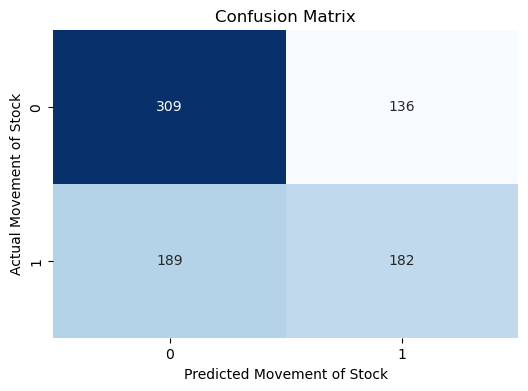

In [55]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_of_nb_Model_1, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Movement of Stock')
plt.ylabel('Actual Movement of Stock')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [56]:
# Assuming you have the 'Sentiment_Polarity' column in the 'predictors_test' dataframe
# Get the indices of the test set
test_indices = predictors_test.index

# Create a dataframe with the predicted datapoints and their corresponding sentiment polarity
predicted_data_with_sentiment = pd.DataFrame({
    'Predicted': y_pred_nb_model_1,
    'Sentiment_Polarity': predictors.loc[test_indices, 'Sentiment']
})
predicted_data_with_sentiment

,Predicted,Sentiment_Polarity
268,1,1
809,0,-1
1510,0,1
2632,1,1
86,0,0
...,...,...
1498,1,-1
4049,0,1
2143,0,1
2810,0,1


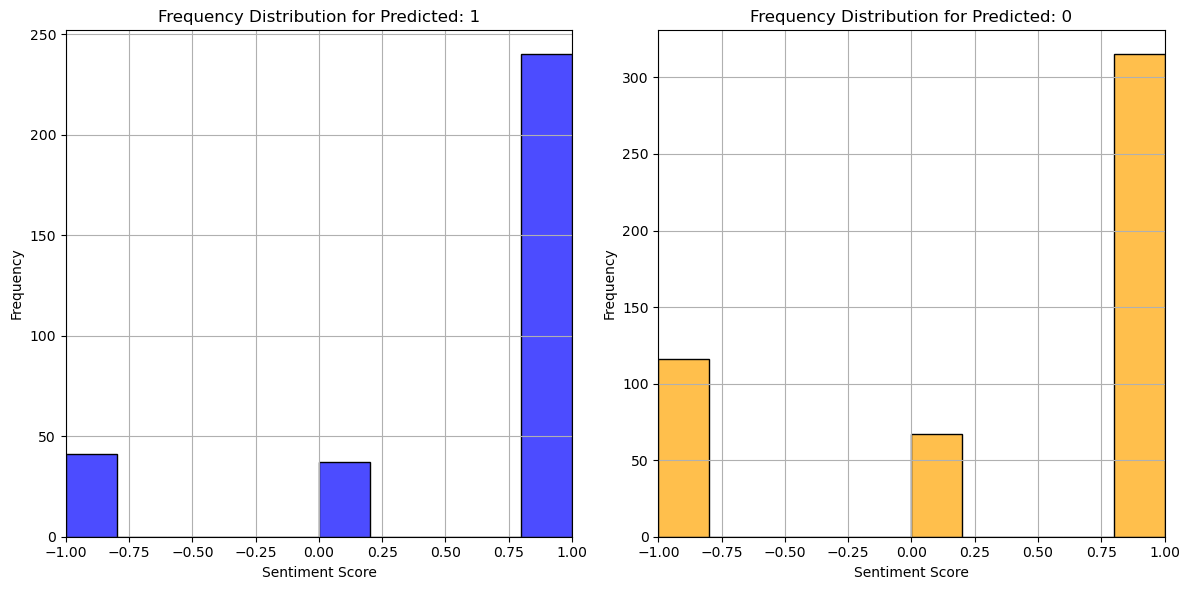

In [57]:
# Create a DataFrame combining the predicted values and the 'Sentiment Score' from the test set
result_df = pd.DataFrame({
    'Predicted Did Price': y_pred_nb_model_1, 
    'Sentiment Score': predictors_test['Sentiment']
})

# Separate the data into two DataFrames based on predicted values '1' as 'Yes' and '0' as 'No'
yes_predictions = result_df[result_df['Predicted Did Price'] == 1]
no_predictions = result_df[result_df['Predicted Did Price'] == 0]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the frequency distribution for predicted '1'
sns.histplot(data=yes_predictions, x='Sentiment Score', bins='auto', color='blue', alpha=0.7, label='Predicted: 1', ax=axes[0])
axes[0].set_title('Frequency Distribution for Predicted: 1')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)
axes[0].set_xlim(-1, 1)

# Plot the frequency distribution for predicted '0'
sns.histplot(data=no_predictions, x='Sentiment Score', bins='auto', color='orange', alpha=0.7, label='Predicted: 0', ax=axes[1])
axes[1].set_title('Frequency Distribution for Predicted: 0')
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)
axes[1].set_xlim(-1, 1)

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

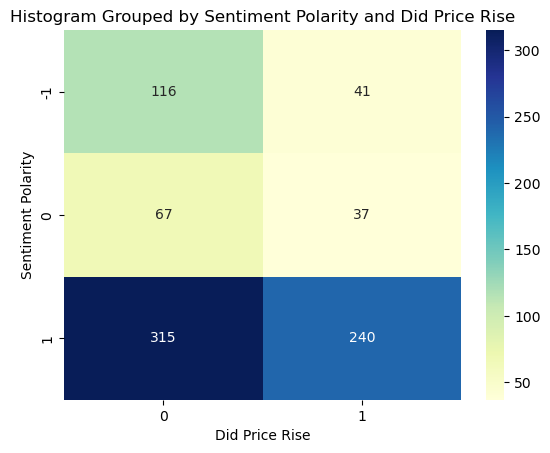

In [58]:
# Create a crosstab to get the counts for each combination of 'Sentiment_Polarity' and 'Did Price Rise'
cross_tab = pd.crosstab(predicted_data_with_sentiment['Sentiment_Polarity'], predicted_data_with_sentiment['Predicted'])

# Plot the heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.xlabel('Did Price Rise')
plt.ylabel('Sentiment Polarity')
plt.title('Histogram Grouped by Sentiment Polarity and Did Price Rise')
plt.show()

## <font color = 'purple'>Results
- The Naïve Bayes model and the logistic regression model yield similar accuracy results. However, both models exhibit a similar issue: they predict class label '0' even when the sentiment polarity is positive. We anticipated the models to predict a price increase when the sentiment polarity is positive and vice versa, predicting a price decrease when the polarity is negative. This indicates that the models are not fully capturing the relationship between sentiment and price movements, requiring further improvements to achieve the desired predictions.

## <font color = 'blue'>Naïve Bayes Model with Sentiment Score

In [59]:
data_for_analysis_4 = grouped_df[['Sentiment Score', '% change in index', '20_Day_MA','Did Price Rise']].copy()
data_for_analysis_4

,Sentiment Score,% change in index,20_Day_MA,Did Price Rise
0,-0.3182,0.404700,136.462494,1
1,-0.9788,-2.182956,135.113747,1
2,0.8519,-2.182956,135.113747,1
3,0.0000,0.661574,135.939625,1
4,0.7096,1.166575,137.384499,0
...,...,...,...,...
4077,0.6344,-0.136326,157.563000,0
4078,0.5504,-0.343302,160.738001,0
4079,0.0000,-0.583852,164.828500,1
4080,0.5719,-0.523248,158.512501,0


In [60]:
y1 = data_for_analysis_4['Did Price Rise']
predictors = data_for_analysis_4.drop(['Did Price Rise'], axis=1)
predictors_train, predictors_test, y_train, y_test = train_test_split(predictors, y1, test_size=0.2)
predictors_train

,Sentiment Score,% change in index,20_Day_MA
1312,0.0000,-0.670988,328.475082
991,0.0000,-0.142516,149.904383
379,0.0000,0.442074,145.164587
735,0.5994,-1.439505,168.341478
2410,0.3818,2.121358,139.117219
...,...,...,...
2765,0.6124,-1.635301,372.088664
2751,0.9070,0.403368,372.687997
2052,0.0000,1.729094,154.371637
287,0.0000,-1.157676,117.655500


In [61]:
# Build the Naive Bayes model (Gaussian Naive Bayes)
nb_model_2 = GaussianNB()

# Train the model on the training data
nb_model_2.fit(predictors_train, y_train)

# Make predictions on the test set
y_pred_nb_model_2 = nb_model_2.predict(predictors_test)

# Evaluate the model
Accuracy_of_nb_Model_2 = accuracy_score(y_test, y_pred_nb_model_2)
confusion_matrix_of_nb_Model_2 = confusion_matrix(y_test, y_pred_nb_model_2)

print("Confusion Matrix:")
print(confusion_matrix_of_nb_Model_2)
print("Accuracy of Naive Bayes Model 2:", Accuracy_of_nb_Model_2)

Confusion Matrix:
[[319 118]
 [207 172]]
Accuracy of Naive Bayes Model 2: 0.6017156862745098


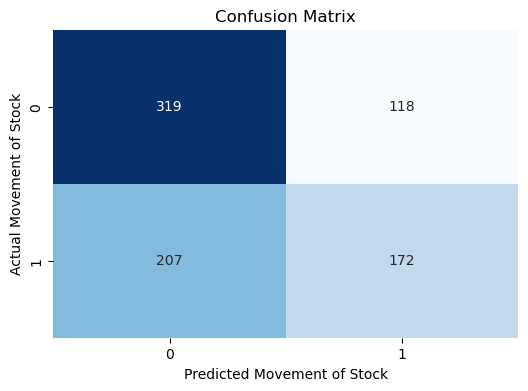

In [62]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix_of_nb_Model_2, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Movement of Stock')
plt.ylabel('Actual Movement of Stock')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [63]:
# Assuming you have the 'Sentiment_Polarity' column in the 'predictors_test' dataframe
# Get the indices of the test set
test_indices = predictors_test.index

# Create a dataframe with the predicted datapoints and their corresponding sentiment polarity
predicted_data_with_sentiment = pd.DataFrame({
    'Predicted': y_pred_nb_model_2,
    'Sentiment_Polarity': predictors.loc[test_indices, 'Sentiment Score']
})
predicted_data_with_sentiment

,Predicted,Sentiment_Polarity
1656,1,0.6486
1910,0,0.6858
3427,0,0.9142
437,0,0.0000
1706,1,0.0000
...,...,...
723,0,0.2500
2843,0,0.6124
923,0,0.0000
3099,0,0.7349


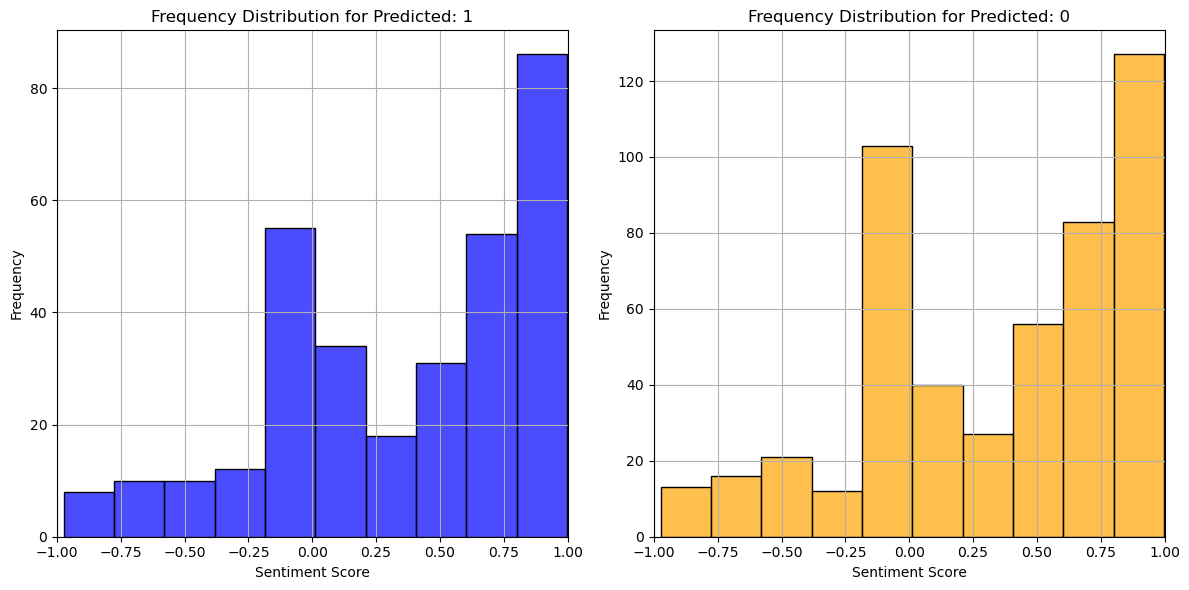

In [64]:
# Create a DataFrame combining the predicted values and the 'Sentiment Score' from the test set
result_df = pd.DataFrame({
    'Predicted Did Price': y_pred_nb_model_1, 
    'Sentiment Score': predictors_test['Sentiment Score']
})

# Separate the data into two DataFrames based on predicted values '1' as 'Yes' and '0' as 'No'
yes_predictions = result_df[result_df['Predicted Did Price'] == 1]
no_predictions = result_df[result_df['Predicted Did Price'] == 0]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the frequency distribution for predicted '1'
sns.histplot(data=yes_predictions, x='Sentiment Score', bins='auto', color='blue', alpha=0.7, label='Predicted: 1', ax=axes[0])
axes[0].set_title('Frequency Distribution for Predicted: 1')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)
axes[0].set_xlim(-1, 1)

# Plot the frequency distribution for predicted '0'
sns.histplot(data=no_predictions, x='Sentiment Score', bins='auto', color='orange', alpha=0.7, label='Predicted: 0', ax=axes[1])
axes[1].set_title('Frequency Distribution for Predicted: 0')
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)
axes[1].set_xlim(-1, 1)

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

### <font color = 'blue'>Results from Naïve Bayes Model with Sentiment Score
- The current model exhibits an accuracy ranging from 55% to 60%, and most of the incorrect predictions are due to false positives.

- Regarding the frequency distribution graph, it illustrates the sentiment score distribution for class label '1' (representing price increase) and class label '0' (representing price decrease). In the frequency distribution of class label '1', we anticipate that the majority of data points will have sentiment scores greater than 0, indicating positive sentiment in the grouped tweets. The distribution confirms this expectation, as it is skewed towards positive sentiment scores.

- However, in the frequency distribution with class label '0', we observe an unexpected skew towards positive sentiment scores rather than being skewed towards the negative sentiment side. This suggests that for a significant number of data points with positive sentiment, the model predicts '0' (price decrease).

# <font color  = 'purple'>Possible Improvements :<font>

- Due to the unsatisfactory performance of both the Logistic Regression and Naïve Bayes models on the data, it would be prudent to investigate whether there is any data imbalance present.

- Considering the limited number of features (only 3), we can explore the addition of new features that can help infer from the data where positive sentiments did not result in a price increase.

- To enrich the model, we can also incorporate additional features such as user influence, the number of tweets related to a stock, and the number of likes received on those tweets. These features might offer valuable information to enhance the predictive capabilities of the model.

- Once we achieve the desired accuracy level with these improvements, we can explore transitioning from binary classification, which predicts price movement, to stock price prediction. This transition would require adapting the model to handle regression tasks, where the model predicts the actual price values rather than binary price movements.

- It is crucial to perform thorough data analysis to identify any data imbalances that might be affecting the models' performance. Addressing data imbalances can lead to better model generalization and more accurate predictions.

- Feature engineering plays a vital role in enhancing model performance. By creating new features that capture meaningful relationships between sentiment, price movements, and other relevant variables, we can potentially gain deeper insights and improve prediction accuracy.

- Introducing user influence, tweet count, and likes as features can provide additional context to the model. Users with high influence might have a more significant impact on stock perceptions, and the number of tweets and likes could represent the level of public engagement.

- Once the models show promising accuracy levels, it is essential to validate their performance on unseen data (e.g., using cross-validation or a separate test set) to ensure robustness and avoid overfitting.

- As we transition to stock price prediction, we need to consider time-series aspects of the data. Time lags, temporal patterns, and seasonality might significantly influence stock prices, requiring the utilization of appropriate time-series modeling techniques.

- Continuous monitoring and updating of the model will be necessary to adapt to changing market conditions, news, and sentiment trends.

## <font color = 'purple'>Appendix
[1] https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction by HANNA YUKHYMENKO
    
[2] Mittal, A., & Goel, A.. Stock Prediction Using Twitter Sentiment Analysis. Unpublished manuscript, Stanford University. Retrieved from [http://cs230.stanford.edu/projects_fall_2021/reports/103158402.pdf]
    
[3] Singh, S., & Kaur, A. (2022). Twitter sentiment analysis for stock prediction. Paper presented at the 2nd International Conference on "Advancement in Electronics & Communication Engineering (AECE 2022)", July 14-15, 2022.
    
[4] Yahoo Finance—Stock Market Live, Quotes, Business & Finance News (n.d.).
https://finance.yahoo.com/